In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


# Regression imports
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score,train_test_split, KFold
from xgboost import XGBRFRegressor

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('CreditScore_train.csv')
df_test = pd.read_csv('CreditScore_test.csv')

In [4]:
df.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,NaN,807
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318,0.8417,1,1,1,0,NaN,0,NaN,819
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,NaN,0,0,0,0,NaN,0,NaN,803
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,NaN,1,1,1,0,NaN,0,NaN,530
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413,1.0180,1,1,1,0,NaN,0,NaN,485


In [5]:
df_test.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1566464,21.0,21.0,21.0,44.0,1,0,0,4,0,...,0,NaN,0,0,1,1,5.0,0,NaN,406
1,925102,108.0,2.0,27.0,156.0,0,2,3,3,1,...,13090,0.593,1,1,1,0,1.0,0,NaN,679
2,1273974,218.0,64.0,107.0,218.0,0,0,0,0,0,...,13689,1.014,1,1,1,0,1.0,13689,1.014,750
3,1456723,NaN,NaN,NaN,146.0,1,0,0,1,1,...,0,NaN,1,1,1,0,NaN,0,NaN,515
4,798267,0.0,0.0,0.0,230.0,1,2,4,0,2,...,0,NaN,1,1,1,0,NaN,0,NaN,589


In [6]:
df_test.y = np.nan

In [7]:
df_test.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1566464,21.0,21.0,21.0,44.0,1,0,0,4,0,...,0,NaN,0,0,1,1,5.0,0,NaN,NaN
1,925102,108.0,2.0,27.0,156.0,0,2,3,3,1,...,13090,0.593,1,1,1,0,1.0,0,NaN,NaN
2,1273974,218.0,64.0,107.0,218.0,0,0,0,0,0,...,13689,1.014,1,1,1,0,1.0,13689,1.014,NaN
3,1456723,NaN,NaN,NaN,146.0,1,0,0,1,1,...,0,NaN,1,1,1,0,NaN,0,NaN,NaN
4,798267,0.0,0.0,0.0,230.0,1,2,4,0,2,...,0,NaN,1,1,1,0,NaN,0,NaN,NaN


In [8]:
df = pd.concat([df,df_test])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 19999
Columns: 305 entries, x001 to y
dtypes: float64(42), int64(263)
memory usage: 233.5 MB


In [10]:
df.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,NaN,807.0
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318,0.8417,1,1,1,0,NaN,0,NaN,819.0
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,NaN,0,0,0,0,NaN,0,NaN,803.0
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,NaN,1,1,1,0,NaN,0,NaN,530.0
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413,1.0180,1,1,1,0,NaN,0,NaN,485.0


In [11]:
df_y = pd.DataFrame({'y':df.y})

In [12]:
df_y

,y
0,807.0
1,819.0
2,803.0
3,530.0
4,485.0
...,...
19995,NaN
19996,NaN
19997,NaN
19998,NaN


In [13]:
dff = df.drop(['y'],axis=1)

In [14]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 19999
Columns: 304 entries, x001 to x304
dtypes: float64(41), int64(263)
memory usage: 232.7 MB


In [15]:
def imputevalues(col):
    col.fillna(col.mean(),inplace=True)
    return col
    

In [16]:
# dff = dff.apply(lambda x:x.fillna(x.mean()))
dff = dff.apply(imputevalues)

In [17]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 19999
Columns: 304 entries, x001 to x304
dtypes: float64(41), int64(263)
memory usage: 232.7 MB


In [18]:
dfd = pd.concat([dff,df_y],axis=1)

In [19]:
counter = Counter(dfd.isnull().sum())
counter

Counter({0: 304, 20000: 1})

In [20]:
train_preprocessed = dfd[dfd.y.notna()]

In [21]:
train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 0 to 79999
Columns: 305 entries, x001 to y
dtypes: float64(42), int64(263)
memory usage: 186.8 MB


In [22]:
test_preprocessed = dfd[dfd.y.isna()]

In [23]:
test_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Columns: 305 entries, x001 to y
dtypes: float64(42), int64(263)
memory usage: 46.7 MB


In [24]:
X = train_preprocessed.loc[:,train_preprocessed.columns != 'y']

In [25]:
Y = train_preprocessed['y']

In [26]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.30,random_state=30)

In [27]:
linear = LinearRegression()
linear.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

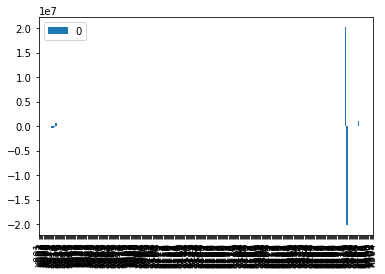

In [28]:
pd.DataFrame(linear.coef_,train_x.columns).plot(kind = "bar")

In [29]:
linear_train_pred = linear.predict(train_x)

In [30]:
linear_test_pred = linear.predict(test_x)

In [31]:
np.sqrt(mean_squared_error(linear_train_pred,train_y))

46.282068926204275

In [32]:
np.sqrt(mean_squared_error(linear_test_pred,test_y))

46.79908213259257

In [33]:
def model_fit(model, train_train_X, train_test_X, train_train_y, train_test_y, 
              train_X, train_y, test_X, filename ):
    
    
    
    model.fit(train_train_X,train_train_y)

    train_predict = model.predict(train_train_X)

    test_predict = model.predict(train_test_X)

    print("Train_train RMSE : ",np.sqrt(mean_squared_error(train_predict,train_train_y)))
    
    print("Train_test RMSE : ",mean_absolute_error(test_predict,train_test_y))
    
    print("Train_test MAE : ",np.sqrt(mean_squared_error(test_predict,train_test_y)))
    
    model.fit(train_X, train_y)
    
    test_hack_predict = model.predict(test_X)
    print("Test Data : ",test_hack_predict)
    

In [34]:
lass = Lasso(alpha=0.1, normalize=True)
model_fit(lass,train_x,test_x,train_y,test_y,X,Y,test_preprocessed.drop(['y'],axis=1),"lasso_solution.csv")

Train_train RMSE :  72.56052372802775
Train_test RMSE :  60.351715252469894
Train_test MAE :  72.88481459502835
Test Data :  [553.24296174 684.76644529 664.67285061 ... 554.72129868 544.99601729
 572.3022388 ]


In [35]:
ridge = Ridge(alpha=0.3,normalize=True) 
model_fit(ridge,train_x,test_x,train_y,test_y,X,Y,test_preprocessed.drop(['y'],axis=1),"ridge_solution.csv")

Train_train RMSE :  48.18000254415638
Train_test RMSE :  36.68501077081413
Train_test MAE :  48.59657920772386
Test Data :  [453.84514092 696.91109836 710.97995956 ... 456.35048807 497.69163102
 536.43347826]


In [36]:
elastic = ElasticNet(alpha=0.2,l1_ratio=0.2,normalize=True)
model_fit(elastic,train_x,test_x,train_y,test_y,X,Y,test_preprocessed.drop(['y'],axis=1),"elastic_solution.csv")

Train_train RMSE :  117.98793129998114
Train_test RMSE :  101.73442266626137
Train_test MAE :  118.64100936500347
Test Data :  [619.03309506 619.50550517 619.4852838  ... 619.04157075 619.29873403
 619.32598575]


In [37]:
GDR = SGDRegressor(max_iter=100, tol=1e-3)
# GDR.fit(train_x,train_y)


In [38]:
model_fit(GDR,train_x,test_x,train_y,test_y,X,Y,test_preprocessed.drop(['y'],axis=1),"GDR.csv")

Train_train RMSE :  2.8873747205347187e+20
Train_test RMSE :  2.8060997037517226e+20
Train_test MAE :  2.896283129209794e+20
Test Data :  [2.77612198e+20 1.74179234e+20 2.46713284e+20 ... 1.68526104e+20
 2.30058769e+20 2.32643630e+20]


In [39]:
# Decision Tree Regressor

In [40]:
dtr = DecisionTreeRegressor()
model_fit(dtr,train_x,test_x,train_y,test_y,X,Y,test_preprocessed.drop(['y'],axis=1),"decision_tree.csv")

Train_train RMSE :  0.0
Train_test RMSE :  30.177416666666666
Train_test MAE :  43.46491880432617
Test Data :  [406. 681. 791. ... 516. 502. 523.]


In [41]:
# RF
rf = RandomForestRegressor()
model_fit(rf,train_x,test_x,train_y,test_y,X,Y,test_preprocessed.drop(['y'],axis=1),"random_forest.csv")

Train_train RMSE :  13.254983604559563
Train_test RMSE :  21.894029166666666
Train_test MAE :  31.182146086876916
Test Data :  [440.2 713.5 786.8 ... 451.5 501.8 537.9]


In [43]:
xg_bst_rf = XGBRFRegressor()
model_fit(xg_bst_rf,train_x,test_x,train_y,test_y,X,Y,test_preprocessed.drop(['y'],axis=1),"random_forest.csv")

Train_train RMSE :  41.2984135169853
Train_test RMSE :  31.77236508178711
Train_test MAE :  42.17546329485558
Test Data :  [397.33942 731.0771  793.94696 ... 504.79175 495.6338  516.1401 ]


In [45]:
models = []
models.append(('LR', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge(alpha=0.3,normalize=True) ))
models.append(('EN', ElasticNet(alpha=0.2,l1_ratio=0.2,normalize=True)))
models.append(('SDGR', SGDRegressor(max_iter=100, tol=1e-3)))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFC', RandomForestRegressor()))
models.append(('XGBR', XGBRFRegressor()))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=30)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -35.191492 (0.173116)
Lasso: -37.924048 (0.271689)
Ridge: -36.958733 (0.217226)
EN: -101.011135 (0.821679)
SDGR: -220176846454292676608.000000 (71619570747204100096.000000)
DTR: -30.216554 (0.428966)
RFC: -21.730825 (0.285889)
XGBR: -31.889130 (0.325164)


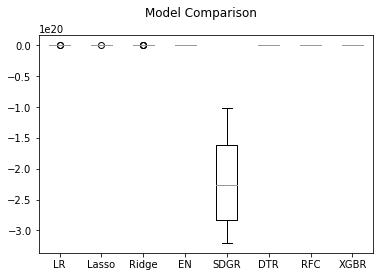

In [46]:
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()